In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
import keras
from keras.preprocessing import image
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import load_model
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

In [5]:
os.listdir('Veg-dataset/Veg-dataset/train_set')

['Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot']

In [6]:
train_datagen=ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [7]:
train=train_datagen.flow_from_directory('Veg-dataset/Veg-dataset/test_set',target_size=(256,256),batch_size=32)

val=val_datagen.flow_from_directory('Veg-dataset/Veg-dataset/train_set',target_size=(256,256),batch_size=32)

Found 3416 images belonging to 9 classes.
Found 11386 images belonging to 9 classes.


In [8]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import scipy

In [10]:
t_img,label=train.next()

In [11]:
t_img.shape

(32, 256, 256, 3)

In [12]:
def plotImage(imgarr,label):
  for im,l in zip(imgarr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/255)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


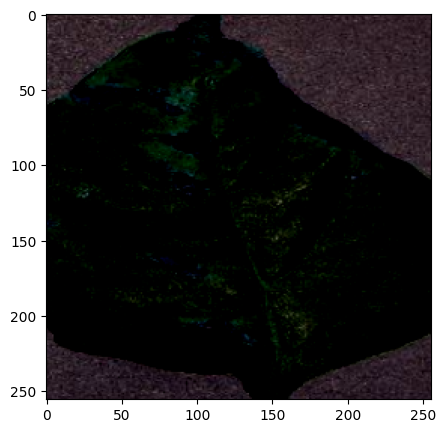

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


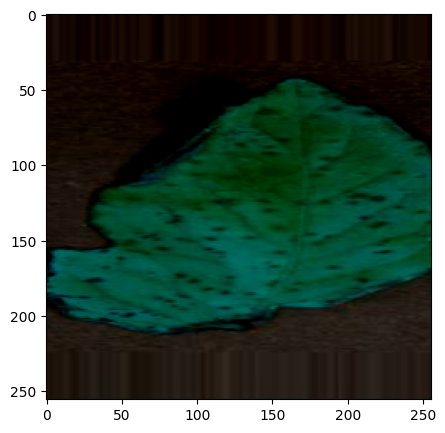

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


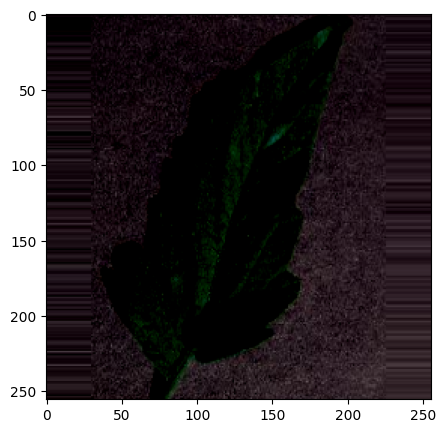

In [13]:
plotImage(t_img[:3],label[:3])

In [14]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [15]:
base_model=VGG19(input_shape=(256,256,3),include_top=False)

In [16]:
for layer in base_model.layers:
  layer.trainable=False

In [17]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [18]:
X=Flatten()(base_model.output)
X=Dense(units=9,activation='softmax')(X)

model=Model(base_model.input,X)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [21]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [22]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)

mc=ModelCheckpoint(filepath='veg.h5',monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1,save_best_only=True)


cb=[es,mc]

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [24]:
model.fit_generator(train,steps_per_epoch=16,epochs=50,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2748\1613728924.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train,steps_per_epoch=16,epochs=50,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 15.7421 - accuracy: 0.4107 
Epoch 1: val_accuracy improved from -inf to 0.71094, saving model to veg.h5
16/16 [==============================] - 614s 39s/step - loss: 15.7421 - accuracy: 0.4107 - val_loss: 5.2603 - val_accuracy: 0.7109
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 4.9998 - accuracy: 0.7129 
Epoch 2: val_accuracy improved from 0.71094 to 0.76758, saving model to veg.h5
16/16 [==============================] - 598s 39s/step - loss: 4.9998 - accuracy: 0.7129 - val_loss: 4.2177 - val_accuracy: 0.7676
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 3.6323 - accuracy: 0.7812 
Epoch 3: val_accuracy improved from 0.76758 to 0.86328, saving model to veg.h5
16/16 [==============================] - 600s 39s/step - loss: 3.6323 - accuracy: 0.7812 - val_loss: 2.4717 - val_accuracy: 0.8633
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 3.4967 - accuracy:

In [25]:
from keras.preprocessing import image
import tensorflow
# from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import load_model
import numpy as np

In [26]:
from confection import ModelField



model1=load_model('veg.h5')

In [34]:
imge=tensorflow.keras.utils.load_img('C:/Users/DELL/Desktop/Flask-master/Image-Classification-Webapp/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b6220993-c51f-48fa-bee9-fb5cb89cc0c4___RS_Early.B 7467.JPG',target_size=(256,256))

In [35]:
x=img_to_array(imge)
im=preprocess_input(x)
image1=np.expand_dims(im,axis=0)


In [36]:
pred=np.argmax(model1.predict(image1))

1/1 [==============================] - 2s 2s/step


In [37]:
pred

2